In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
from forest_fire_clustering.forest_fire_clustering import FFC

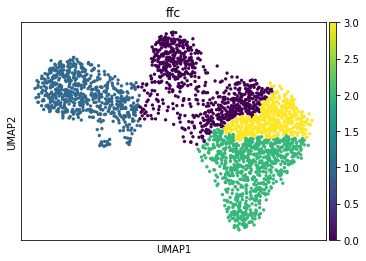

In [8]:
adata = sc.datasets.pbmc3k()
sc.pp.recipe_zheng17(adata)
sc.tl.pca(adata, n_comps=50)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

# Adding FFC to existing scanpy workflow
ffc = FFC(n_neighbors=50)
ffc.preprocess(adata.obsm["X_umap"])
ffc.fit(fire_temp=25)
adata.obs["ffc"] = ffc.cluster_labels

sc.pl.umap(adata, color=["ffc"])

In [9]:
# Internal validation
ffc.validate()
ffc.entropy()
ffc.pval()

MC iteration 0
MC iteration 100
MC iteration 200
MC iteration 300
MC iteration 400


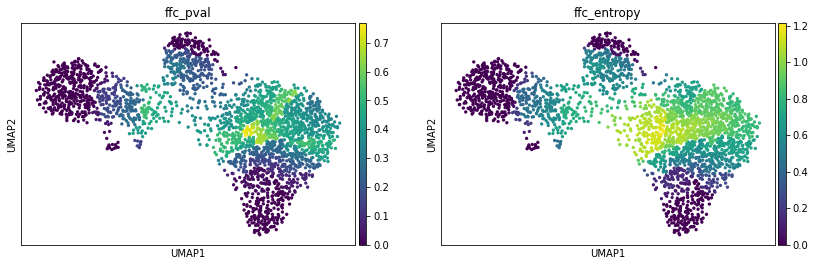

In [10]:
adata.obs["ffc_pval"] = ffc.pval_list
adata.obs["ffc_entropy"] = ffc.entropy_list
sc.pl.umap(adata, color=["ffc_pval", "ffc_entropy"])